In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,  accuracy_score
from sklearn.model_selection import train_test_split
import joblib
import sklearn

# Reading Data

In [53]:
df = pd.read_csv('BankNote_Authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.9529,-2.35480,2.3792,0.48274,0
1,4.1373,0.49248,1.0930,1.82760,0
2,4.7181,10.01530,-3.9486,-3.85820,0
3,4.1654,-3.44950,3.6430,1.08790,0
4,4.4069,10.90720,-4.5775,-4.42710,0


# Checking Max and Min Values in Column

In [54]:
rows= df.iloc[:,0]
max = -10000
min = 10000
for row in rows:
    if row > max:
        max = row
    if row < min:
        min = row
print(max,min)

6.8248 -7.0421


In [55]:
rows= df.iloc[:,1]
max = -10000
min = 10000
for row in rows:
    if row > max:
        max = row
    if row < min:
        min = row
print(max,min)

12.9516 -13.7731


In [56]:
rows= df.iloc[:,2]
max = -10000
min = 10000
for row in rows:
    if row > max:
        max = row
    if row < min:
        min = row
print(max,min)

17.9274 -5.2861


In [57]:
rows= df.iloc[:,3]
max = -10000
min = 10000
for row in rows:
    if row > max:
        max = row
    if row < min:
        min = row
print(max,min)

2.4495 -8.5482


In [58]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

# No of Fake and Real Notes

In [59]:
fig = px.histogram(df, x='class')
fig.show()

In [60]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000
mean,0.320635,1.777566,1.457237,-1.183341,0.468510
std,2.837195,5.870025,4.345114,2.098431,0.499199
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.844575,-1.842725,-1.472600,-2.389550,0.000000
50%,0.330155,2.102350,0.653475,-0.578890,0.000000
75%,2.677875,6.647050,3.306450,0.399335,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


C:\Users\varsh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



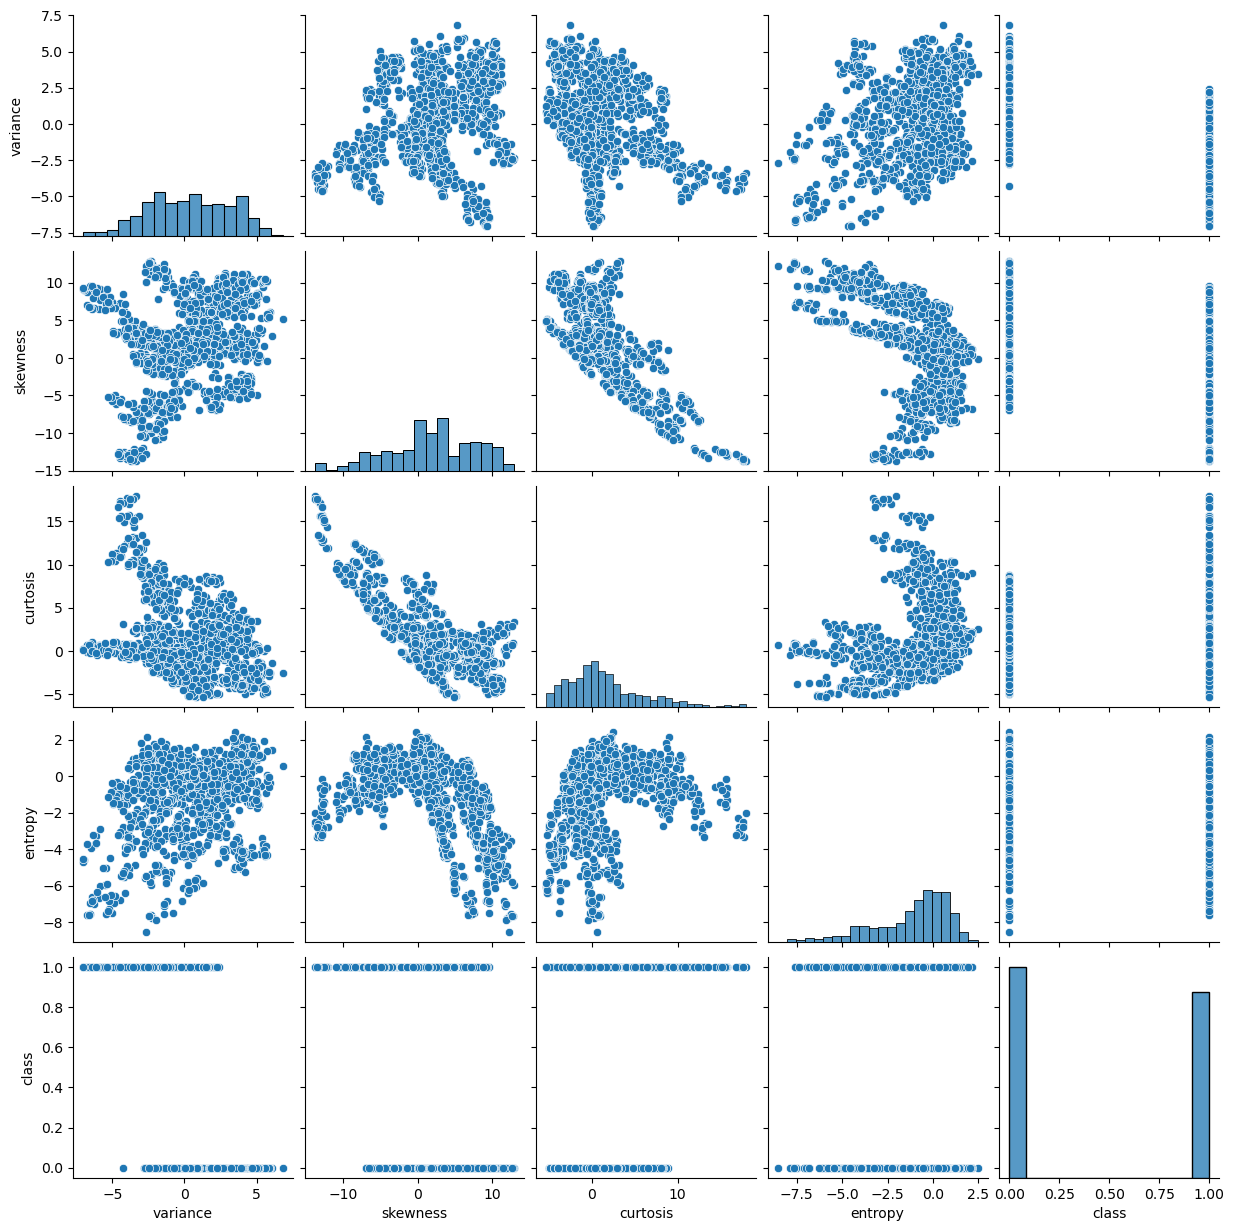

In [61]:
sns.pairplot(df)

# Obtaining Training and Testing Data

In [62]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

# Spliting Data

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0) 

# Model 1 - Randon Forest Classifier

In [64]:
model1 = RandomForestClassifier(random_state=1) 

model1.fit(X_train, y_train) 

y_pred1 = model1.predict(X_test) 

print(classification_report(y_test, y_pred1)) 

print(accuracy_score(y_test, y_pred1)) 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       134
           1       0.99      0.99      0.99       127

    accuracy                           0.99       261
   macro avg       0.99      0.99      0.99       261
weighted avg       0.99      0.99      0.99       261

0.9923371647509579


# Model 2 - SVC

In [65]:
model2 = SVC(degree=8) 

model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

print(classification_report(y_test, y_pred2)) 

print(accuracy_score(y_test, y_pred2))

"""------------------------------------------------------------------"""

# Loading trained model and checking against custom values

joblib.dump(model2,'model2-svc.joblib')

model = joblib.load('model2-svc.joblib')

y = [[3.62160,8.6661,-2.8073,-0.44699]]

y_pred2 = model.predict(y)

if y_pred2 == 1:
    print("Authentic")
else:
    print("not Authentic")

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       134
           1       0.99      1.00      1.00       127

    accuracy                           1.00       261
   macro avg       1.00      1.00      1.00       261
weighted avg       1.00      1.00      1.00       261

0.9961685823754789
not Authentic


# Model 3 - Logistic Regression

In [50]:
model3 = LogisticRegression() 

model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)  

#joblib.dump(lr_object,'model.joblib')

print(classification_report(y_test, y_pred3)) 

#model = joblib.load('model.joblib')

#y_pred1 = model.predict([[-2.54190,-0.65804,2.6842,1.19520]])

#print(y_pred1)


print(accuracy_score(y_test, y_pred3)) 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       157
           1       0.98      1.00      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

0.9927272727272727


# Model 4 - Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier
model4=DecisionTreeClassifier()
model4.fit(X_train,y_train)
y_pred4=model4.predict(X_test)
print(classification_report(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       134
           1       0.98      0.97      0.97       127

    accuracy                           0.97       261
   macro avg       0.97      0.97      0.97       261
weighted avg       0.97      0.97      0.97       261

0.9731800766283525


# Model 5 - Naive Bayes Classifier

In [67]:
from sklearn.naive_bayes import GaussianNB
model5=GaussianNB()
model5.fit(X_train,y_train)
y_pred5=model5.predict(X_test)
print(classification_report(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       134
           1       0.83      0.78      0.80       127

    accuracy                           0.82       261
   macro avg       0.82      0.82      0.82       261
weighted avg       0.82      0.82      0.82       261

0.8160919540229885


# Conclusion

In [51]:
'''
Using SVC as it is the best performing model
'''

'\nUsing SVC as it is the best performing model\n'